In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv('TvMarketing.csv')

In [5]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


Text(0, 0.5, 'Sales')

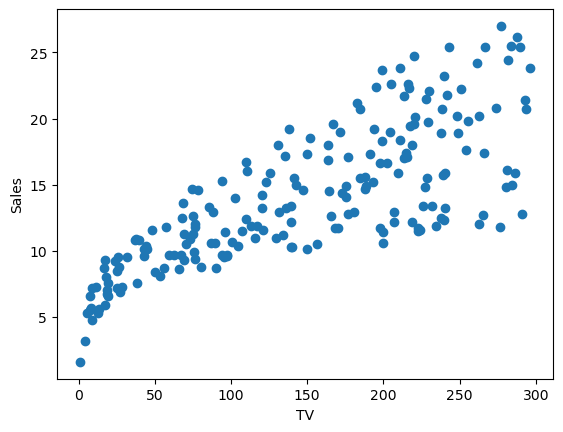

In [6]:
## Scatter plot
plt.scatter(df['TV'],df['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")

In [7]:
## Corellation
df.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


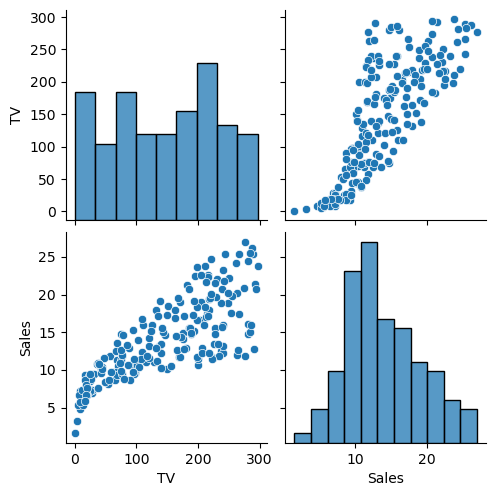

In [8]:
##Seaborn for visulizatoin

import seaborn as sns
sns.pairplot(df)

In [9]:
## Independent and dependent feature
X= df[['TV']]
y=df['Sales']

In [12]:
## Train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)



In [13]:
X_train.shape

(150, 1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_test

array([[ 0.12193673],
       [ 0.50040985],
       [ 1.64997774],
       [-1.66549396],
       [ 0.7939918 ],
       [-0.91798007],
       [ 0.75272526],
       [-1.21392011],
       [ 0.81875173],
       [ 0.26106392],
       [-1.43204325],
       [-1.14081938],
       [ 0.96141605],
       [-1.73977373],
       [-0.15867574],
       [ 0.20329076],
       [-1.71737189],
       [ 0.52634882],
       [-0.91562198],
       [ 0.99560832],
       [ 0.90246385],
       [-1.00405028],
       [-1.35540539],
       [ 1.15477926],
       [-0.98990175],
       [-1.17265357],
       [ 0.71381681],
       [-0.16103383],
       [-0.77531574],
       [-1.70440241],
       [ 0.55228778],
       [-0.98754366],
       [ 0.54167639],
       [-1.60418367],
       [ 1.50613437],
       [ 1.00504068],
       [-1.23396386],
       [ 1.42360129],
       [-0.42160255],
       [-1.47920501],
       [-0.43575108],
       [ 0.28346576],
       [-1.29527414],
       [-1.0688977 ],
       [ 0.83761643],
       [-1

In [17]:
## apply simple linerar regression
from sklearn.linear_model import LinearRegression

In [22]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [23]:
print("Coefficient or slope :",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope : [3.97732877]
Intercept: 14.30466666666667


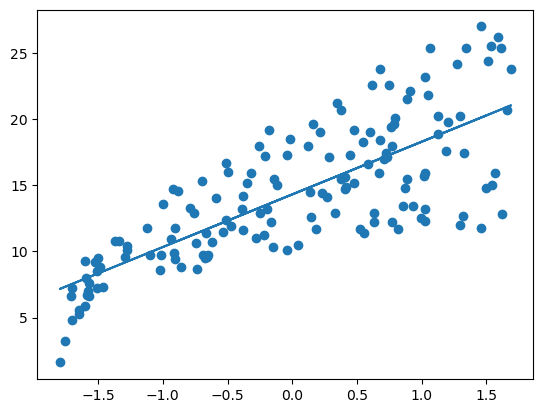

In [24]:
##plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [25]:
y_pred=regression.predict(X_test)

In [26]:
## performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
mse = mean_squared_error(y_test,y_pred);
mae = mean_absolute_error(y_test,y_pred);
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

9.179298570399792
2.273770594370873
3.029735726164873


In [31]:
from sklearn.metrics import r2_score

In [32]:
score = r2_score(y_test,y_pred)
print(score)

0.6606120390330492


Adjusted R2 = 1-[(1-r^2)*(n-1)/(n-k-1)]

In [34]:
##display adjusted R-square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6535414565129043

In [35]:
## predection for new data
regression.predict(scaler.transform([[72]]))

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([10.50818532])